In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
cluster_customer = pd.read_csv('cluster_customer_data.csv')

In [3]:
cluster_customer.head(10)

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
cluster_customer.shape

(8950, 18)

In [5]:
cluster_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
cluster_customer = cluster_customer.drop(columns = 'Unnamed: 0')

In [7]:
cluster_customer.duplicated().sum()

0

In [8]:
cluster_customer.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# ***Outlier Detection and Treatment***

In [9]:
cluster_customer.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

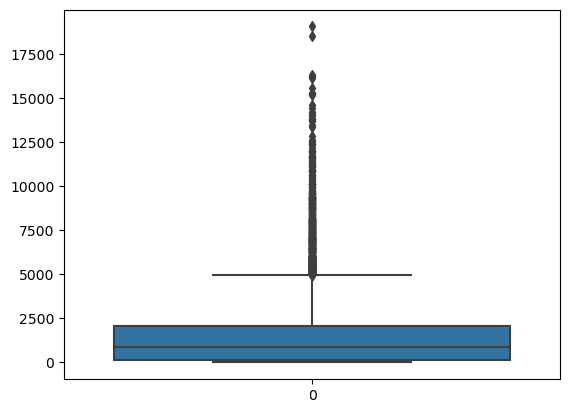

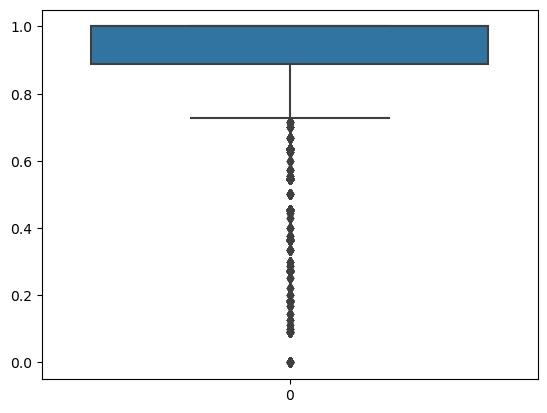

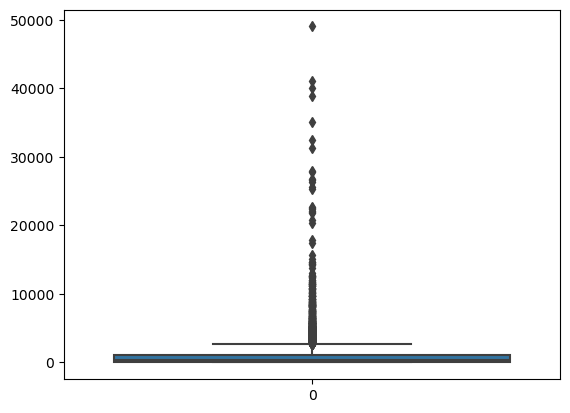

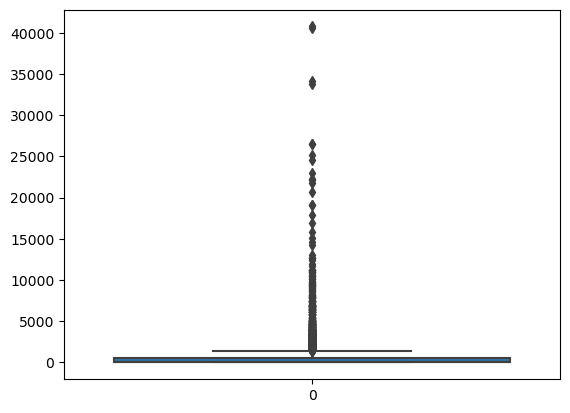

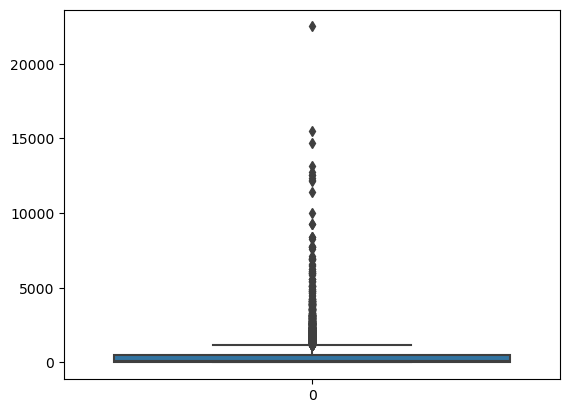

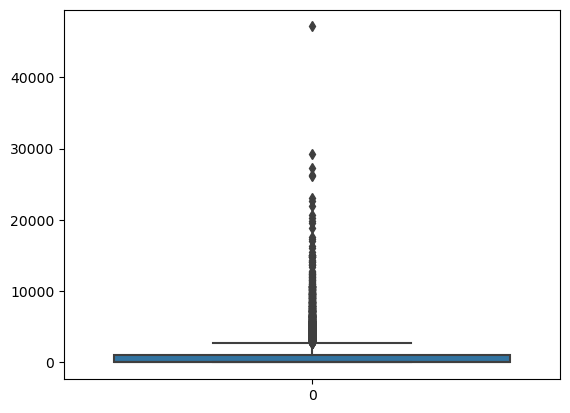

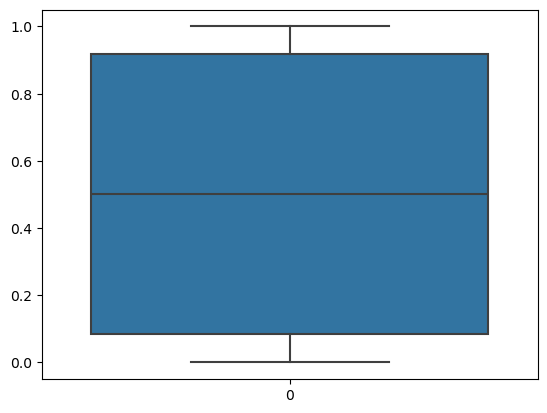

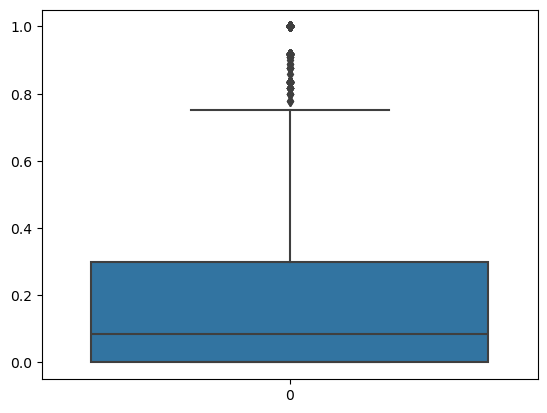

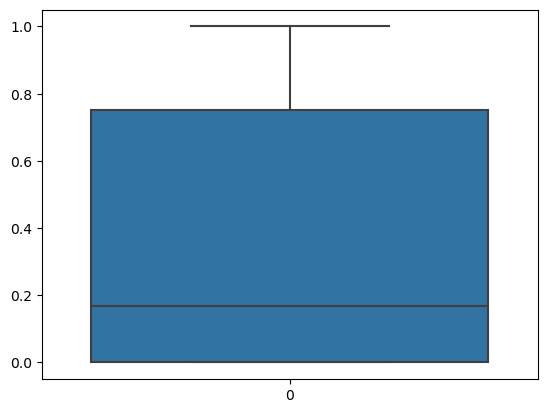

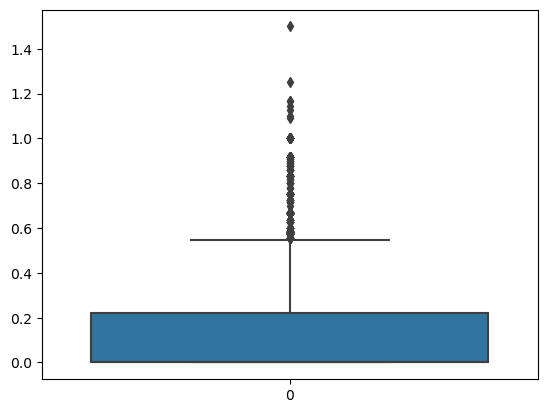

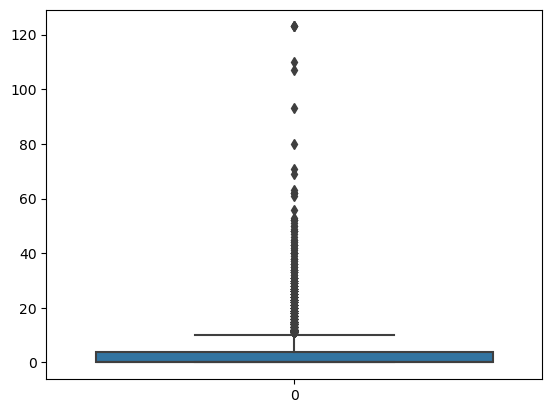

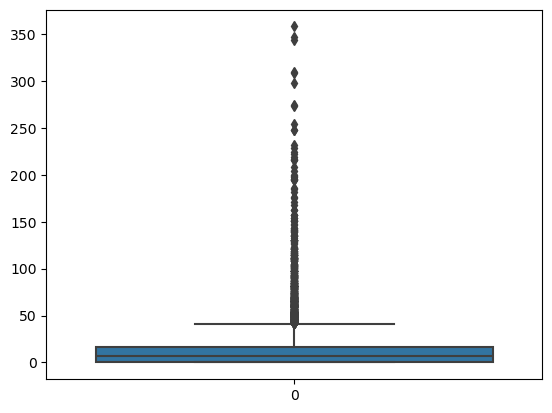

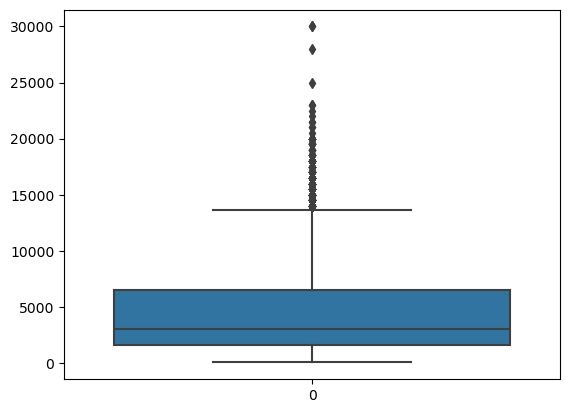

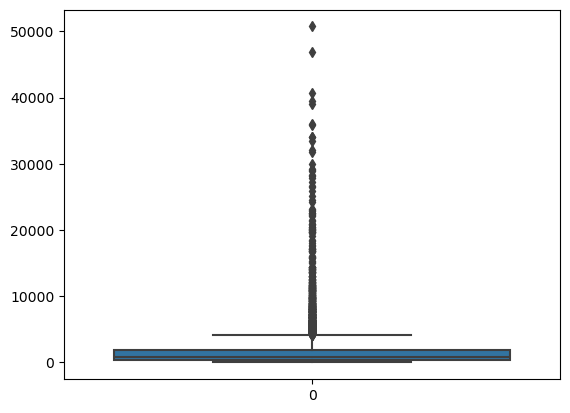

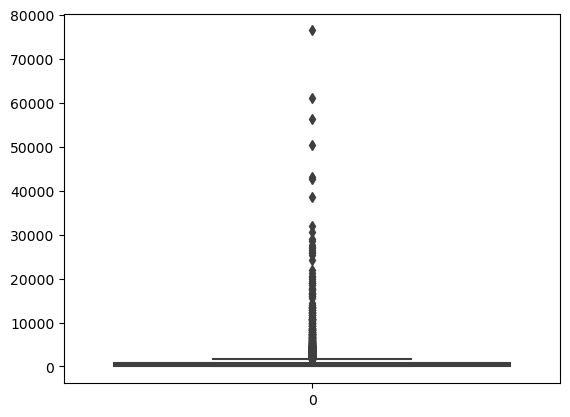

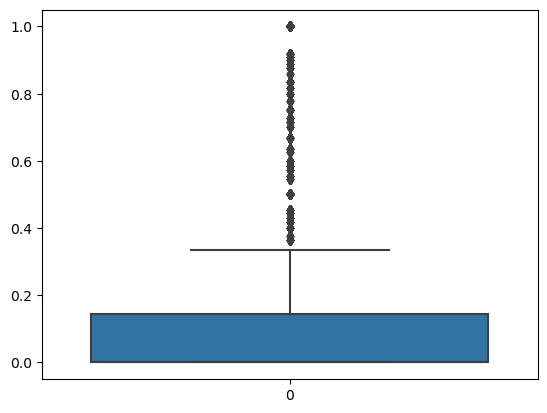

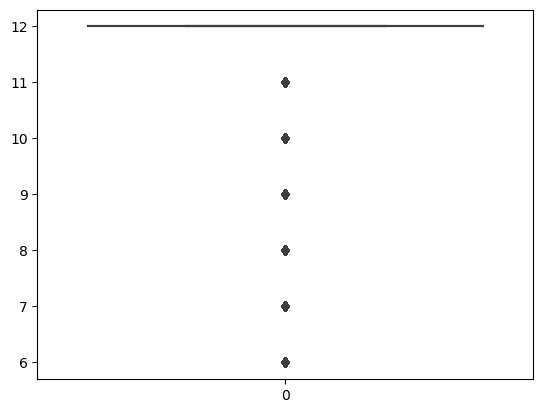

In [10]:
for i in cluster_customer.columns:
    sns.boxplot(cluster_customer[i])
    plt.show()

In [11]:
clust_copy = cluster_customer.copy()

In [12]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [13]:
clust_copy.apply(outliertreat_IQR)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-2760.505265,0.722223,-1566.1075,-866.1075,-702.95625,-1670.731709,-1.166668,-0.45,-1.125,-0.333333,-6.0,-23.0,-5750.0,-1893.511060,-755.926115,-0.214286,12.0
1,4942.927215,1.166666,2715.8725,1443.5125,1171.59375,2784.552848,2.166668,0.75,1.875,0.555555,10.0,41.0,13850.0,4177.921543,1715.497271,0.357143,12.0


In [14]:
clust_copy['BALANCE'] = clust_copy['BALANCE'].clip(lower = -2760.505265, upper = 4942.927215)
clust_copy['BALANCE_FREQUENCY'] = clust_copy['BALANCE_FREQUENCY'].clip(lower = 0.722223, upper = 1.166666)
clust_copy['PURCHASES'] = clust_copy['PURCHASES'].clip(lower = -1566.1075, upper = 2715.8725)
clust_copy['ONEOFF_PURCHASES'] = clust_copy['ONEOFF_PURCHASES'].clip(lower = -866.1075, upper = 1443.5125)
clust_copy['INSTALLMENTS_PURCHASES'] = clust_copy['INSTALLMENTS_PURCHASES'].clip(lower = -702.95625, upper = 1171.59375)
clust_copy['CASH_ADVANCE'] = clust_copy['CASH_ADVANCE'].clip(lower = -1670.731709, upper = 2784.552848)
clust_copy['PURCHASES_FREQUENCY'] = clust_copy['PURCHASES_FREQUENCY'].clip(lower = -1.166668, upper = 2.166668)
clust_copy['ONEOFF_PURCHASES_FREQUENCY'] = clust_copy['ONEOFF_PURCHASES_FREQUENCY'].clip(lower = -0.45, upper = 0.75)
clust_copy['PURCHASES_INSTALLMENTS_FREQUENCY'] = clust_copy['PURCHASES_INSTALLMENTS_FREQUENCY'].clip(lower = -1.125, upper = 1.875)
clust_copy['CASH_ADVANCE_FREQUENCY'] = clust_copy['CASH_ADVANCE_FREQUENCY'].clip(lower = -0.333333, upper = 0.555555)
clust_copy['CASH_ADVANCE_TRX'] = clust_copy['CASH_ADVANCE_TRX'].clip(lower = -6.0, upper = 10.0)
clust_copy['PURCHASES_TRX'] = clust_copy['PURCHASES_TRX'].clip(lower = -23.0, upper = 41.0)
clust_copy['CREDIT_LIMIT'] = clust_copy['CREDIT_LIMIT'].clip(lower = -5750.0, upper = 13850.0)
clust_copy['PAYMENTS'] = clust_copy['PAYMENTS'].clip(lower = -1893.511060, upper = 4177.921543)
clust_copy['MINIMUM_PAYMENTS'] = clust_copy['MINIMUM_PAYMENTS'].clip(lower = -755.926115, upper = 1715.497271)
clust_copy['PRC_FULL_PAYMENT'] = clust_copy['PRC_FULL_PAYMENT'].clip(lower = -0.214286, upper = 0.357143)

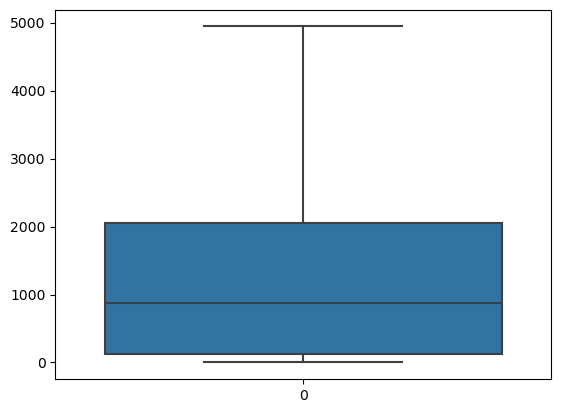

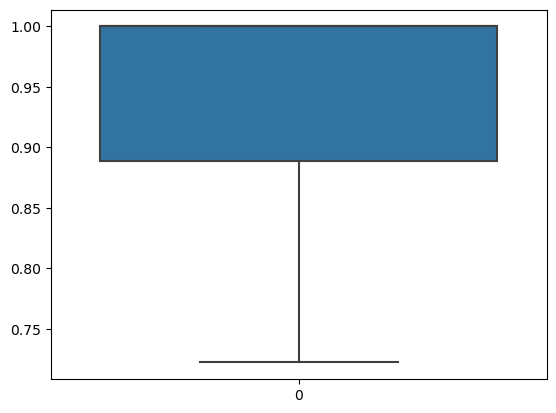

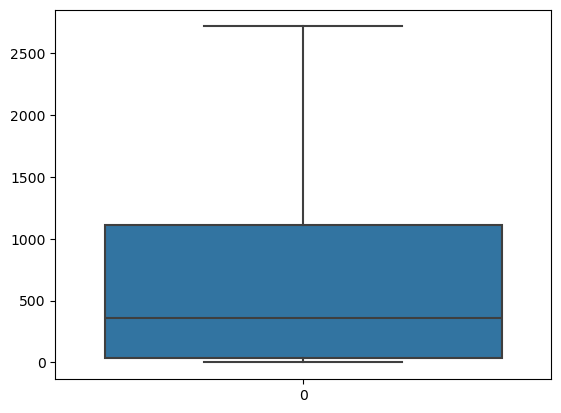

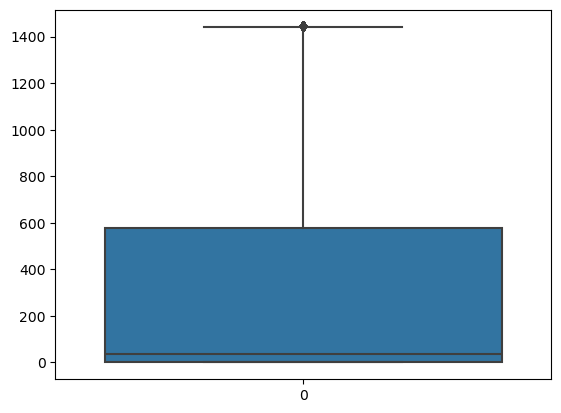

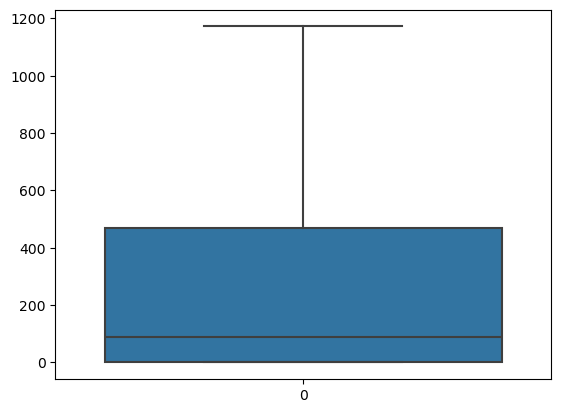

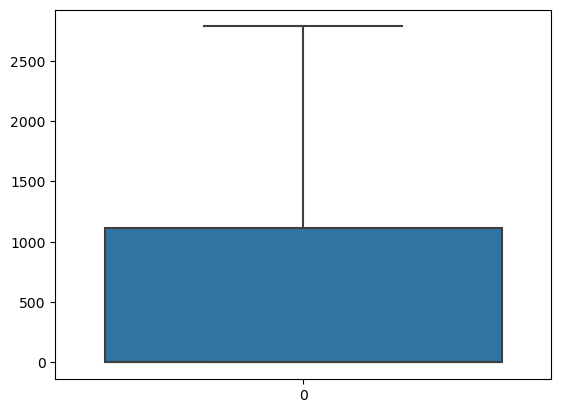

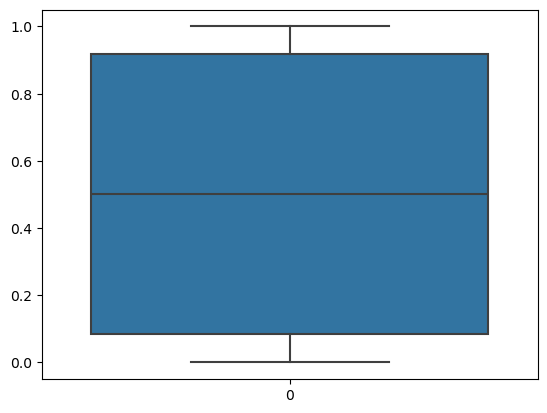

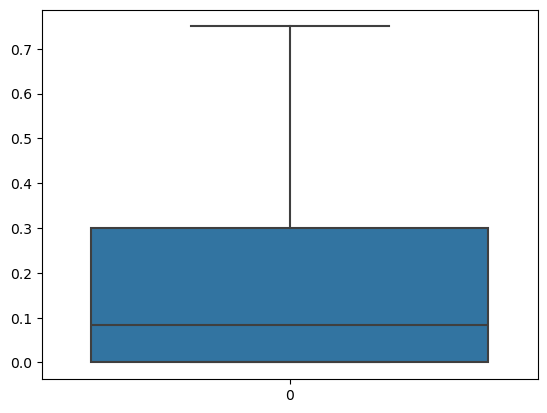

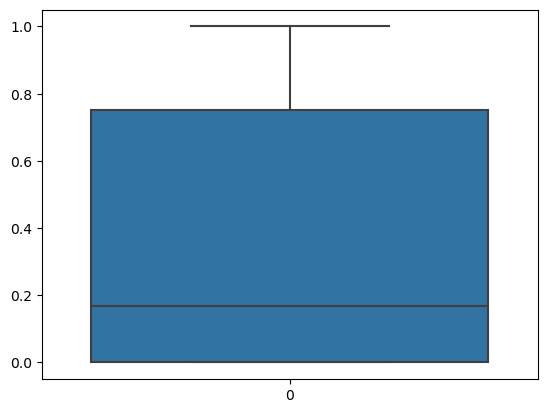

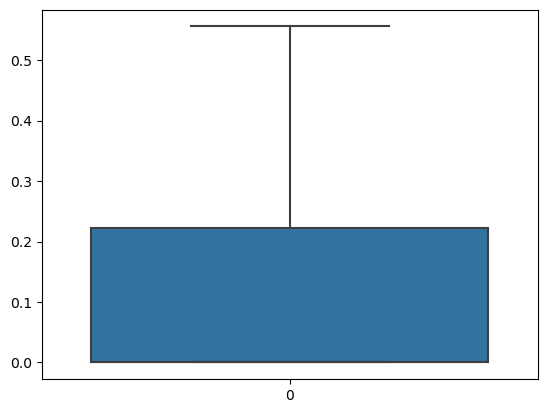

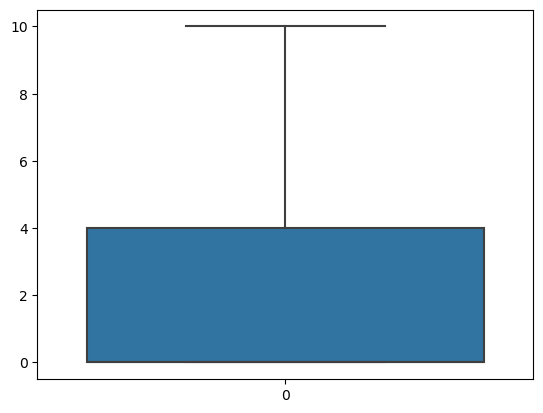

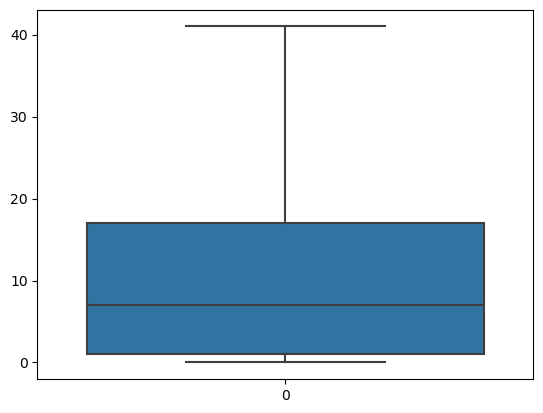

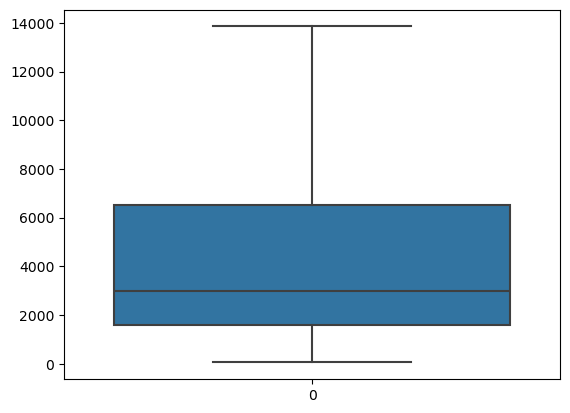

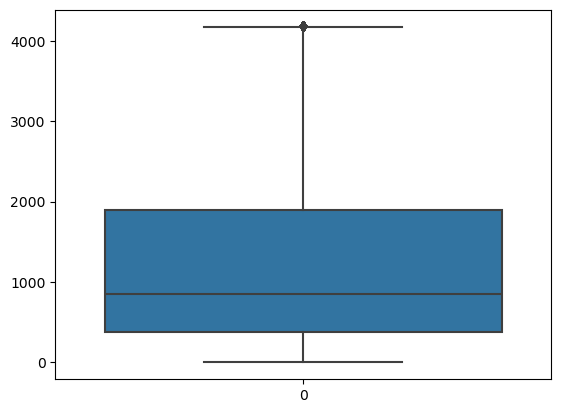

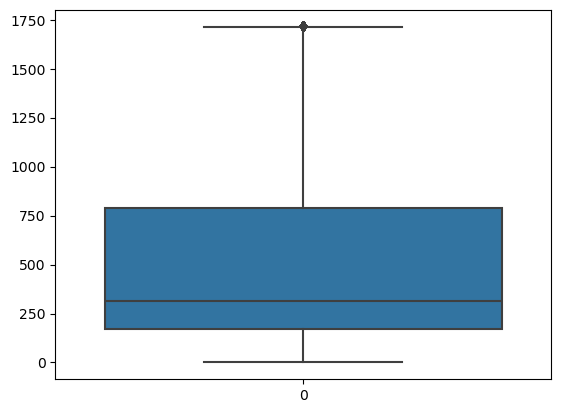

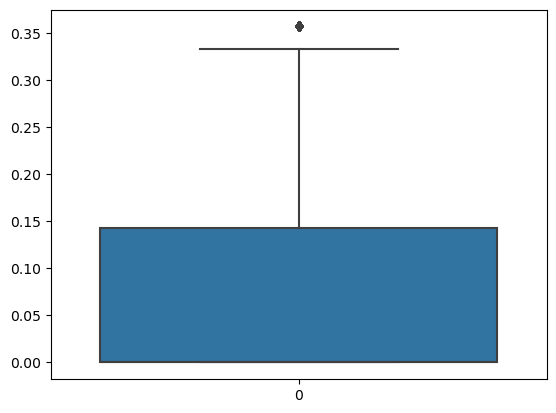

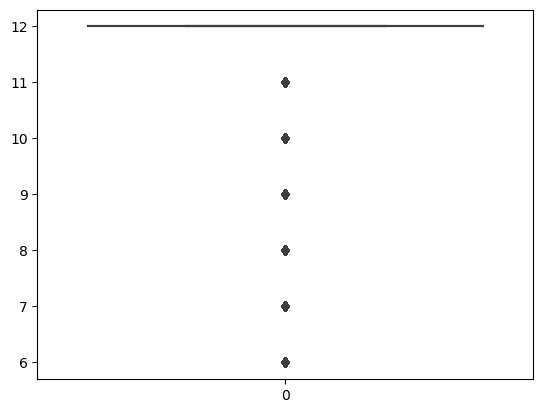

In [15]:
for i in clust_copy.columns:
    sns.boxplot(clust_copy[i])
    plt.show()

# ***converting the data into standardization form***

In [16]:
# difference between StandardScaler() and MinMaxScaler()?
# StandardScaler() is used for standardization of the data
# z_scores = (x-x_mean)/x_stddev

# MinMaxScaler() is used for normalization of the data ('when there is no mean and stddev')
# normalized_scores = (x - x_min)/(x_max - x_min)

In [17]:
SS = StandardScaler()
cust_scale = SS.fit_transform(clust_copy)

In [18]:
pd.DataFrame(cust_scale).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.877821,-1.021877,-0.729687,-0.692383,-0.505216,-0.673507,-0.806490,-0.722749,-0.707313,-0.730084,-0.697293,-0.737970,-1.010503,-0.899859,-0.784078,-0.629277,0.36068
1,1.178546,-0.202709,-0.838160,-0.692383,-0.746029,2.115343,-1.221758,-0.722749,-0.916995,0.717792,0.473089,-0.891333,0.762757,2.165375,0.968887,0.973960,0.36068
2,0.718487,0.616460,0.040957,0.818320,-0.746029,-0.673507,1.269843,2.210909,-0.916995,-0.730084,-0.697293,0.028848,0.910528,-0.569653,0.132544,-0.629277,0.36068
3,0.179623,-1.886551,0.866246,2.128108,-0.746029,-0.467401,-1.014125,-0.396788,-0.916995,-0.247460,-0.404697,-0.814651,0.910528,-1.058417,-0.459290,-0.629277,0.36068
4,-0.372561,0.616460,-0.819967,-0.661121,-0.746029,-0.673507,-1.014125,-0.396788,-0.916995,-0.730084,-0.697293,-0.814651,-0.951394,-0.525443,-0.586234,-0.629277,0.36068


# ***Dimensionality Reduction . applying PCA***

In [19]:
cust_scale.shape

(8950, 17)

In [20]:
pc = PCA (n_components = 17).fit(cust_scale)

In [21]:
pc.explained_variance_   

array([5.36457356, 4.06769018, 1.54530496, 1.35732426, 1.07839869,
       0.86722646, 0.63797409, 0.53633488, 0.4264228 , 0.32255939,
       0.21857531, 0.18508268, 0.13224091, 0.11709787, 0.06312968,
       0.05359279, 0.02837115])

In [22]:
sum(pc.explained_variance_)

17.001899653592577

In [23]:
pc.explained_variance_ / sum(pc.explained_variance_)

array([0.31552789, 0.23924916, 0.09089014, 0.07983368, 0.06342813,
       0.05100762, 0.03752369, 0.03154559, 0.02508089, 0.01897196,
       0.01285593, 0.010886  , 0.00777801, 0.00688734, 0.0037131 ,
       0.00315216, 0.0016687 ])

In [24]:
# amount of variance that each PC explains 
pc.explained_variance_ratio_

array([0.31552789, 0.23924916, 0.09089014, 0.07983368, 0.06342813,
       0.05100762, 0.03752369, 0.03154559, 0.02508089, 0.01897196,
       0.01285593, 0.010886  , 0.00777801, 0.00688734, 0.0037131 ,
       0.00315216, 0.0016687 ])

In [25]:
# cummulative variance explained 
var = np.round(np.cumsum(pc.explained_variance_ratio_) * 100, 2)
var

array([ 31.55,  55.48,  64.57,  72.55,  78.89,  83.99,  87.75,  90.9 ,
        93.41,  95.31,  96.59,  97.68,  98.46,  99.15,  99.52,  99.83,
       100.  ])

In [26]:
pd.DataFrame({'Eigen_Values': pc.explained_variance_, 
                  'VAR': np.round(pc.explained_variance_ratio_*100, 2), 
                      'Cumm_VAR': var}, index = range(1, 18))

,Eigen_Values,VAR,Cumm_VAR
1,5.364574,31.55,31.55
2,4.067690,23.92,55.48
3,1.545305,9.09,64.57
4,1.357324,7.98,72.55
5,1.078399,6.34,78.89
6,0.867226,5.10,83.99
7,0.637974,3.75,87.75
8,0.536335,3.15,90.90
9,0.426423,2.51,93.41
10,0.322559,1.90,95.31


In [27]:
# **The number of Principal components have choosen as 6 based on cumulative variance is explaining > 75 % 
# and individual component having Eigen value > 0.8.**

In [28]:
pc_final = PCA( n_components = 6 ).fit(cust_scale)

In [29]:
pc_final

PCA(n_components=6)

In [30]:
pc_final.explained_variance_

array([5.36457356, 4.06769018, 1.54530496, 1.35732426, 1.07839869,
       0.86722646])

In [31]:
cust_scale.shape

(8950, 17)

In [32]:
reduced_cr = pc_final.transform(cust_scale)  # the out put is Components (P1, P2, ...)

In [33]:
dimensions = pd.DataFrame(reduced_cr)

In [34]:
dimensions.shape

(8950, 6)

In [35]:
dimensions.columns = [ "P1", "P2", "P3", "P4", "P5", "P6" ]  #these are not clusters, these are just variables 17 now 6.

In [36]:
pd.DataFrame(cust_scale).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.877821,-1.021877,-0.729687,-0.692383,-0.505216,-0.673507,-0.806490,-0.722749,-0.707313,-0.730084,-0.697293,-0.737970,-1.010503,-0.899859,-0.784078,-0.629277,0.36068
1,1.178546,-0.202709,-0.838160,-0.692383,-0.746029,2.115343,-1.221758,-0.722749,-0.916995,0.717792,0.473089,-0.891333,0.762757,2.165375,0.968887,0.973960,0.36068
2,0.718487,0.616460,0.040957,0.818320,-0.746029,-0.673507,1.269843,2.210909,-0.916995,-0.730084,-0.697293,0.028848,0.910528,-0.569653,0.132544,-0.629277,0.36068
3,0.179623,-1.886551,0.866246,2.128108,-0.746029,-0.467401,-1.014125,-0.396788,-0.916995,-0.247460,-0.404697,-0.814651,0.910528,-1.058417,-0.459290,-0.629277,0.36068
4,-0.372561,0.616460,-0.819967,-0.661121,-0.746029,-0.673507,-1.014125,-0.396788,-0.916995,-0.730084,-0.697293,-0.814651,-0.951394,-0.525443,-0.586234,-0.629277,0.36068


In [37]:
dimensions.head()

,P1,P2,P3,P4,P5,P6
0,-1.637876,-2.369803,0.237368,-0.673316,-0.172906,0.008891
1,-2.149811,2.351193,0.542645,0.992185,-2.203215,0.104840
2,1.198834,0.301369,1.508361,-1.982372,0.786107,0.173647
3,-0.469129,-0.537878,2.456555,-0.730582,-0.292396,1.114697
4,-1.642396,-1.574645,0.177495,-1.443635,0.112804,-0.555603


In [38]:
# pc_final.components_
# print pd.DataFrame(pc_final.components_,columns=telco_num.columns).T
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,
                         columns = clust_copy.columns).T

In [39]:
Loadings.to_excel("Loadings.xlsx")

In [40]:
dimensions.shape

(8950, 6)

In [41]:
km_3 = KMeans(n_clusters = 3, random_state = 123).fit(dimensions)
km_4 = KMeans( n_clusters = 4, random_state = 123).fit(dimensions)
km_5 = KMeans( n_clusters = 5, random_state = 123).fit(dimensions)
km_6 = KMeans( n_clusters = 6, random_state = 123).fit(dimensions)
km_7 = KMeans( n_clusters = 7, random_state = 123).fit(dimensions)
km_8 = KMeans( n_clusters = 8, random_state = 123).fit(dimensions)
km_9 = KMeans( n_clusters = 9, random_state = 123).fit(dimensions)
km_10 = KMeans( n_clusters = 10, random_state = 123).fit(dimensions)

C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\clust

In [42]:
# save the cluster labels and sort by cluster
clust_copy['cluster_3'] = km_3.labels_
clust_copy['cluster_4'] = km_4.labels_
clust_copy['cluster_5'] = km_5.labels_
clust_copy['cluster_6'] = km_6.labels_
clust_copy['cluster_7'] = km_7.labels_
clust_copy['cluster_8'] = km_8.labels_
clust_copy['cluster_9'] = km_9.labels_
clust_copy['cluster_10'] = km_10.labels_

In [43]:
clust_copy.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,40.900749,0.818182,95.4000,0.0000,95.40000,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,0,1,4,5,3,4,2,3
1,3202.467416,0.909091,0.0000,0.0000,0.00000,2784.552848,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,1,2,0,4,6,1,6,7
2,2495.148862,1.000000,773.1700,773.1700,0.00000,0.000000,1.000000,0.750000,0.000000,0.000000,...,0.000000,12,2,0,2,3,5,3,0,2
3,1666.670542,0.722223,1499.0000,1443.5125,0.00000,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12,0,1,4,5,3,4,2,2
4,817.714335,1.000000,16.0000,16.0000,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,0,1,2,1,2,3,5,4
5,1809.828751,1.000000,1333.2800,0.0000,1171.59375,0.000000,0.666667,0.000000,0.583333,0.000000,...,0.000000,12,0,3,1,0,1,0,3,1
6,627.260806,1.000000,2715.8725,1443.5125,688.38000,0.000000,1.000000,0.750000,1.000000,0.000000,...,0.357143,12,2,0,3,3,5,2,1,9
7,1823.652743,1.000000,436.2000,0.0000,436.20000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,12,0,3,1,0,1,0,3,1
8,1014.926473,1.000000,861.4900,661.4900,200.00000,0.000000,0.333333,0.083333,0.250000,0.000000,...,0.000000,12,0,1,2,1,2,3,5,4
9,152.225975,0.722223,1281.6000,1281.6000,0.00000,0.000000,0.166667,0.166667,0.000000,0.000000,...,0.000000,12,0,1,4,5,3,4,2,3


# **Quantitative evaluation of number of clusters**

# **1. Analysis of the cluster size**

In [44]:
pd.Series(km_3.labels_).value_counts()

0    4585
1    2305
2    2060
Name: count, dtype: int64

In [45]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

0    0.512291
1    0.257542
2    0.230168
Name: count, dtype: float64

In [46]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())* 100

0    51.22905
1    25.75419
2    23.01676
Name: count, dtype: float64

In [47]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())* 100

1    37.418994
3    23.162011
2    20.826816
0    18.592179
Name: count, dtype: float64

In [48]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())* 100

2    24.670391
1    20.279330
4    19.251397
0    17.977654
3    17.821229
Name: count, dtype: float64

In [49]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())* 100

1    23.955307
0    19.608939
5    18.413408
4    17.229050
3    13.486034
2     7.307263
Name: count, dtype: float64

In [50]:
pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())* 100

2    23.776536
1    18.469274
6    15.541899
3    15.363128
5    13.139665
4     7.117318
0     6.592179
Name: count, dtype: float64

In [51]:
pd.Series(km_8.labels_).value_counts()/sum(pd.Series(km_8.labels_).value_counts())* 100

3    20.256983
0    18.134078
4    14.849162
2    12.614525
7    11.944134
1     9.027933
5     7.005587
6     6.167598
Name: count, dtype: float64

In [52]:
pd.Series(km_9.labels_).value_counts()/sum(pd.Series(km_9.labels_).value_counts())* 100

3    18.000000
5    17.921788
2    13.977654
4    10.703911
0     9.530726
6     8.972067
1     8.625698
7     6.178771
8     6.089385
Name: count, dtype: float64

In [53]:
pd.Series(km_10.labels_).value_counts()/sum(pd.Series(km_10.labels_).value_counts())* 100

1    17.754190
4    17.564246
3    13.832402
5    10.279330
2     9.195531
7     8.145251
9     7.318436
0     5.977654
6     5.217877
8     4.715084
Name: count, dtype: float64

In [54]:
# based on the size of the clusters i am going ahead with cluster 4 ,5, 6

# **2. Silhouette Coefficient -- SC**

In [55]:
metrics.silhouette_score( dimensions, km_4.labels_ )

0.2497105763886903

In [56]:
metrics.silhouette_score( dimensions, km_5.labels_ )

0.2332591984070682

In [57]:
metrics.silhouette_score( dimensions, km_6.labels_ )

0.23735175802642522

In [58]:
# based on the SC Score also i am going ahead with cluster 4, 5, 6

In [59]:
# calculate SC for K=3 through K=20
k_range = range(3, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 123)
    km.fit(dimensions)
    scores.append(metrics.silhouette_score(dimensions, km.labels_))

C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\clust

In [60]:
scores

[0.2706966892996858,
 0.2497105763886903,
 0.2332591984070682,
 0.23735175802642522,
 0.25018978233841477,
 0.23928980087569923,
 0.24439715313079016,
 0.2467575223099629,
 0.23729541002418345,
 0.23822242286544695,
 0.24177137167035262,
 0.21760360061462575,
 0.22107199045782663,
 0.23345636472842518,
 0.2376778950558559,
 0.23399553788648803,
 0.2424640076475517,
 0.2362452669291352]

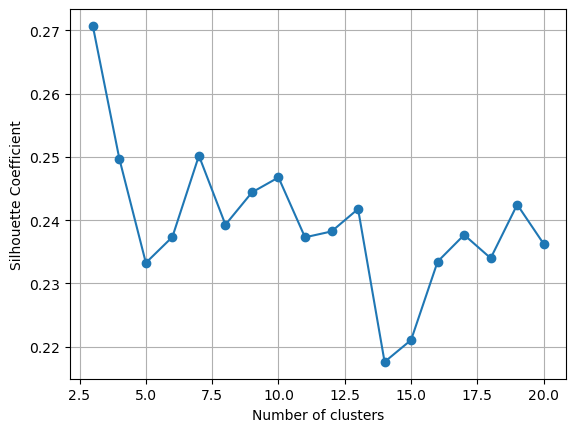

In [61]:
# plot the results
plt.plot(k_range, scores, marker = "o")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

# **3. Elbow Analysis**

In [62]:
cluster_range = range(2, 21)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(dimensions)
    cluster_errors.append(clusters.inertia_)

C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VJahn\anaconda3\Lib\site-packages\sklearn\clust

In [63]:
clusters_df = pd.DataFrame( { "num_clusters": cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,93994.363633
1,3,72065.233645
2,4,61532.183331
3,5,55939.362503
4,6,51020.736366
5,7,46422.613825
6,8,42905.244729
7,9,40165.507824
8,10,38054.035256
9,11,35934.785286


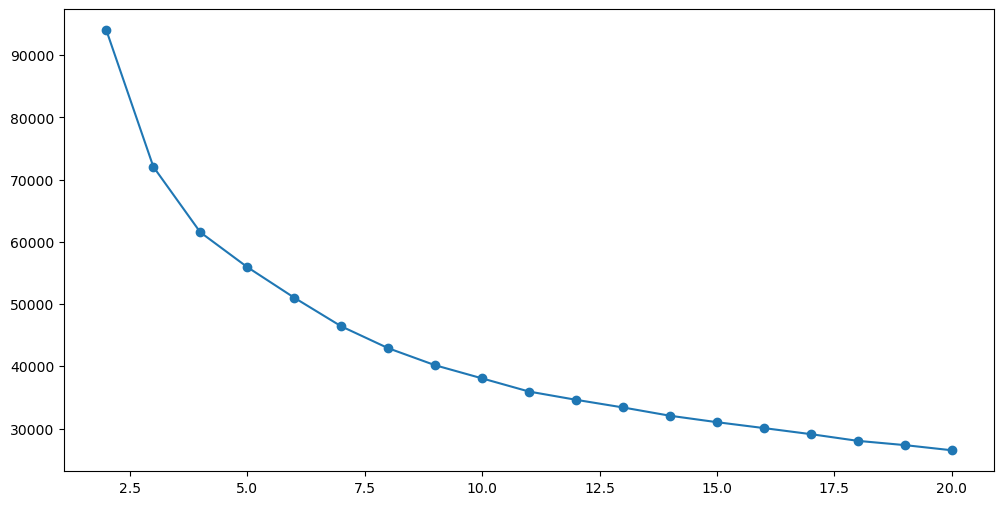

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

In [65]:
# The elbow diagram shows that the gain in explained variance reduces significantly from 1 to 4.
# after 4 the difference in inertia is getting lesser and lesser So, 
# optimal number of clusters could either 4 or 5

In [66]:
clust_copy.groupby('cluster_3').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
cluster_3,,,,,,,,,,,,,,,,,,,,,
0,563.883521,0.895128,391.063068,172.564842,207.142375,171.835916,0.456683,0.100633,0.347641,0.042268,...,320.371611,0.098837,11.437077,1.722792,2.402181,2.093348,1.887459,2.755071,3.468920,2.413086
1,2746.401943,0.961252,230.364043,139.715687,78.795787,1918.750672,0.184778,0.078145,0.109674,0.341634,...,940.790488,0.027320,11.364425,1.819523,0.718004,3.195228,4.322343,4.300217,5.104555,5.360954
2,1713.200430,0.979542,2074.501559,999.150914,734.838123,392.237330,0.907200,0.491358,0.686884,0.071351,...,653.159192,0.128401,11.866990,0.583981,2.543204,2.193204,3.976214,2.527670,2.590777,5.627184


In [67]:
clust_copy.groupby('cluster_3').mean().T

cluster_3,0,1,2
BALANCE,563.883521,2746.401943,1713.200430
BALANCE_FREQUENCY,0.895128,0.961252,0.979542
PURCHASES,391.063068,230.364043,2074.501559
ONEOFF_PURCHASES,172.564842,139.715687,999.150914
INSTALLMENTS_PURCHASES,207.142375,78.795787,734.838123
CASH_ADVANCE,171.835916,1918.750672,392.237330
PURCHASES_FREQUENCY,0.456683,0.184778,0.907200
ONEOFF_PURCHASES_FREQUENCY,0.100633,0.078145,0.491358
PURCHASES_INSTALLMENTS_FREQUENCY,0.347641,0.109674,0.686884
CASH_ADVANCE_FREQUENCY,0.042268,0.341634,0.071351


In [68]:
clust_copy.groupby('cluster_3').sum().T

cluster_3,0,1,2
BALANCE,2.585406e+06,6.330456e+06,3.529193e+06
BALANCE_FREQUENCY,4.104163e+03,2.215685e+03,2.017856e+03
PURCHASES,1.793024e+06,5.309891e+05,4.273473e+06
ONEOFF_PURCHASES,7.912098e+05,3.220447e+05,2.058251e+06
INSTALLMENTS_PURCHASES,9.497478e+05,1.816243e+05,1.513767e+06
CASH_ADVANCE,7.878677e+05,4.422720e+06,8.080089e+05
PURCHASES_FREQUENCY,2.093891e+03,4.259132e+02,1.868833e+03
ONEOFF_PURCHASES_FREQUENCY,4.614002e+02,1.801232e+02,1.012198e+03
PURCHASES_INSTALLMENTS_FREQUENCY,1.593935e+03,2.527987e+02,1.414980e+03
CASH_ADVANCE_FREQUENCY,1.937989e+02,7.874667e+02,1.469820e+02


In [69]:
# Mean value gives a good indication of the distribution of data. 
# So we are finding mean value for each variable for each cluster
Profiling_output = pd.concat( [clust_copy.mean().T, 
                              clust_copy.groupby('cluster_3').mean().T, 
                              clust_copy.groupby('cluster_4').mean().T,
                              clust_copy.groupby('cluster_5').mean().T, 
                              clust_copy.groupby('cluster_6').mean().T,
                              clust_copy.groupby('cluster_7').mean().T, 
                              clust_copy.groupby('cluster_8').mean().T,
                              clust_copy.groupby('cluster_9').mean().T,
                              clust_copy.groupby('cluster_10').mean().T], axis = 1 )

Profiling_output

,0,0,1,2,0,1,2,3,0,1,...,0,1,2,3,4,5,6,7,8,9
BALANCE,1390.508973,563.883521,2746.401943,1713.200430,1873.704983,772.327413,3051.033828,508.228972,3196.250221,549.708097,...,707.900447,527.471020,1101.393769,114.183209,1334.909551,1492.757752,3521.300155,4421.780252,3457.329462,582.653862
BALANCE_FREQUENCY,0.931587,0.895128,0.961252,0.979542,0.980325,0.885499,0.966897,0.935171,0.966389,0.956521,...,0.848067,0.957496,0.959628,0.736501,0.991307,0.944092,0.994701,0.985035,0.985175,0.970545
PURCHASES,737.149330,391.063068,230.364043,2074.501559,2203.409524,268.499873,269.400705,737.889080,304.451369,792.529975,...,266.833364,781.520452,1252.355246,283.289661,147.694434,119.822130,2379.641552,162.433923,1649.089929,2386.959985
ONEOFF_PURCHASES,354.358139,172.564842,139.715687,999.150914,1185.368242,210.940134,155.580687,97.738389,171.697393,100.964678,...,149.094430,80.863933,981.255358,151.527587,98.498524,88.695296,1138.203132,110.799990,787.239491,1201.701141
INSTALLMENTS_PURCHASES,295.546214,207.142375,78.795787,734.838123,676.017948,49.082622,97.823193,566.099670,111.929028,603.734331,...,115.209528,615.528808,115.188960,129.196310,49.298282,30.559696,885.388900,50.493448,657.440376,789.836174
CASH_ADVANCE,672.468924,171.835916,1918.750672,392.237330,423.408333,339.036132,2120.803783,108.748262,2282.693446,118.194887,...,842.445913,92.023341,151.235885,185.530130,329.261479,1834.047707,315.976156,2299.451296,2350.688385,71.351897
PURCHASES_FREQUENCY,0.490351,0.456683,0.184778,0.907200,0.899372,0.208127,0.212553,0.867760,0.231973,0.905123,...,0.382072,0.908827,0.671440,0.263838,0.159525,0.108662,0.928030,0.137664,0.848944,0.943714
ONEOFF_PURCHASES_FREQUENCY,0.184773,0.100633,0.078145,0.491358,0.577536,0.117163,0.086007,0.067536,0.093229,0.071036,...,0.096003,0.054786,0.527329,0.070797,0.064840,0.056113,0.511500,0.055456,0.373793,0.615382
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.347641,0.109674,0.686884,0.630598,0.084104,0.131887,0.812782,0.146983,0.853770,...,0.257954,0.871014,0.170394,0.182283,0.093690,0.052344,0.787303,0.079044,0.664016,0.721867
CASH_ADVANCE_FREQUENCY,0.126061,0.042268,0.341634,0.071351,0.075522,0.077051,0.370670,0.025859,0.390135,0.026800,...,0.171543,0.022166,0.040837,0.024153,0.089565,0.357815,0.047420,0.364649,0.398566,0.017686


In [70]:
# Adding a new variable for 4 clusters in the dimensions data

In [71]:
cl_4 = km_4.labels_

In [72]:
cl_4 = pd.Series(cl_4)

In [73]:
cl_4

0       1
1       2
2       0
3       1
4       1
       ..
8945    3
8946    3
8947    3
8948    1
8949    1
Length: 8950, dtype: int32

In [74]:
dimensions['cl_4'] = cl_4

In [75]:
dimensions.head()

,P1,P2,P3,P4,P5,P6,cl_4
0,-1.637876,-2.369803,0.237368,-0.673316,-0.172906,0.008891,1
1,-2.149811,2.351193,0.542645,0.992185,-2.203215,0.104840,2
2,1.198834,0.301369,1.508361,-1.982372,0.786107,0.173647,0
3,-0.469129,-0.537878,2.456555,-0.730582,-0.292396,1.114697,1
4,-1.642396,-1.574645,0.177495,-1.443635,0.112804,-0.555603,1


In [76]:
cust_scale.shape

(8950, 17)

# **building a KNN model on dimensions data**

In [77]:
y = dimensions['cl_4']

In [78]:
y.head()

0    1
1    2
2    0
3    1
4    1
Name: cl_4, dtype: int32

In [79]:
X = dimensions.columns.difference(['cl_4'])

In [80]:
X

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6'], dtype='object')

In [81]:
x = dimensions[X]

In [82]:
x.head()

,P1,P2,P3,P4,P5,P6
0,-1.637876,-2.369803,0.237368,-0.673316,-0.172906,0.008891
1,-2.149811,2.351193,0.542645,0.992185,-2.203215,0.104840
2,1.198834,0.301369,1.508361,-1.982372,0.786107,0.173647
3,-0.469129,-0.537878,2.456555,-0.730582,-0.292396,1.114697
4,-1.642396,-1.574645,0.177495,-1.443635,0.112804,-0.555603


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn import metrics

In [85]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =123)

In [86]:
x_train.shape

(6265, 6)

In [87]:
y_train.shape

(6265,)

In [88]:
x_test.shape

(2685, 6)

In [89]:
y_test.shape

(2685,)

In [109]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', n_jobs = -1).fit(x_train, y_train) 

In [110]:
y_train_pred = knn.predict(x_train)

In [111]:
#print('ROC_AUC_Train:', metrics.roc_auc_score(y_train, y_train_pred))

In [112]:
#y_train_pred_proba = knn.predict_proba(x_train)[:, 1] 

In [113]:
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

Accuracy: 0.9797286512370311
Confusion Matrix:
 [[1131   15    9   13]
 [   3 2308   12   12]
 [   6   21 1291    5]
 [  12   16    3 1408]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1168
           1       0.98      0.99      0.98      2335
           2       0.98      0.98      0.98      1323
           3       0.98      0.98      0.98      1439

    accuracy                           0.98      6265
   macro avg       0.98      0.98      0.98      6265
weighted avg       0.98      0.98      0.98      6265



In [114]:
y_test_pred = knn.predict(x_test)

In [115]:
#print('ROC_AUC_Test:', metrics.roc_auc_score(y_test, y_test_pred))

In [116]:
#y_test_pred_proba = knn.predict_proba(x_test)[:, 1] 

In [117]:
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Accuracy: 0.9590316573556797
Confusion Matrix:
 [[474   8   4  10]
 [  2 985  12  15]
 [  5  15 514   7]
 [  9  22   1 602]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       496
           1       0.96      0.97      0.96      1014
           2       0.97      0.95      0.96       541
           3       0.95      0.95      0.95       634

    accuracy                           0.96      2685
   macro avg       0.96      0.96      0.96      2685
weighted avg       0.96      0.96      0.96      2685



# ***DBSCAN clustering***
# Density-based spatial clustering of applications with noise (DBSCAN)

In [118]:
# DBSCAN with eps = 1 and min_samples = 3
db = DBSCAN( eps = 1.9, min_samples = 10)
db.fit(cust_scale)

DBSCAN(eps=1.9, min_samples=10)

In [119]:
pd.Series(db.labels_).value_counts()

 0    7917
-1    1001
 1      32
Name: count, dtype: int64

In [120]:
db.labels_

array([ 0,  0,  0, ...,  0,  0, -1], dtype=int64)

In [121]:
# save the cluster labels and sort by cluster
clust_copy['DB_cluster'] = db.labels_

In [122]:
# review the cluster centers
clust_copy.groupby('DB_cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
DB_cluster,,,,,,,,,,,,,,,,,,,,,
-1,2241.244391,0.926928,1422.132335,698.228944,494.626740,1462.374357,0.679124,0.319897,0.478580,0.243556,...,0.088652,10.838162,1.346653,1.172827,1.810190,2.686314,3.613387,3.964036,4.750250,5.340659
0,1269.728725,0.931923,642.917311,306.669458,267.344669,564.760772,0.464465,0.165772,0.347637,0.109743,...,0.087212,11.601238,0.633194,1.531136,2.020968,2.365543,2.913098,2.983832,3.540356,3.714917
1,4660.229985,0.994318,2623.615078,1396.127187,1045.296836,2610.909593,0.989583,0.658854,0.950521,0.487847,...,0.045252,12.000000,2.000000,0.000000,3.000000,2.000000,4.000000,5.000000,7.000000,8.000000
